# 데이터 프레임 가져오기

In [2]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedGroupKFold
from keras.callbacks import EarlyStopping


In [3]:
# 학습 데이터 불러오기
df_Train = pd.read_csv("C:/Users/kkang/Desktop/과목/Coding/python/workspace/DeepLearning/Train.csv")
df_Train = df_Train.dropna(axis=0, how='any',inplace=False) # NAN 값이 있는 행 모두 제거, 17% 제거
df_Train

print(df_Train.count(), "\n") # Train 데이터 개수
print(df_Train.isnull().sum()) #Train 데이터 중 NAN 데이터의 개수

ID                 6665
Gender             6665
Ever_Married       6665
Age                6665
Graduated          6665
Profession         6665
Work_Experience    6665
Spending_Score     6665
Family_Size        6665
Var_1              6665
Segmentation       6665
dtype: int64 

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [4]:
# 데이터 상태 확인용 전체 출력 요청
df_Train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [72]:
# 테스트용 데이터 불러오기
# 추후 k겹 교차 검증 도입 예정
df_Test = pd.read_csv("C:/Users/kkang/Desktop/과목/Coding/python/workspace/DeepLearning/Test.csv")
df_Test = df_Test.dropna(axis=0, how='any',inplace=False) #Test 파일의 NAN 값 모두 제거

print(df_Test.count()) # Test 데이터 개수
print(df_Test.isnull().sum()) # Test 데이터 중 NAN 데이터의 개수

ID                 2154
Gender             2154
Ever_Married       2154
Age                2154
Graduated          2154
Profession         2154
Work_Experience    2154
Spending_Score     2154
Family_Size        2154
Var_1              2154
Segmentation       2154
dtype: int64
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [71]:
# 데이터 상태 확인용 전체 출력 요청
df_Test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D
...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,D
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


# 각 Segment별 데이터 시각화

# 각 범주 데이터 정리

In [7]:
# Segmentation
segment_based = pd.pivot_table(df_Train, values='ID', columns=['Segmentation'], aggfunc=np.count_nonzero)
segment_based_sum = df_Train.count()

# Gender
gender_based = pd.pivot_table(df_Train,values='ID', index=['Gender'], columns=['Segmentation'], aggfunc=np.count_nonzero)
gender_based_sum = pd.pivot_table(df_Train,values='ID', index=['Gender'], aggfunc=["count"])

# Ever_Married 
married_based = pd.pivot_table(df_Train, values='ID', index=['Ever_Married'], columns=['Segmentation'], aggfunc=np.count_nonzero)
married_based_sum = pd.pivot_table(df_Train, values='ID', index=['Ever_Married'], aggfunc=["count"])

# Age
age_based = pd.DataFrame(df_Train.groupby('Segmentation')['Age'].mean())
# Age는 sum으로 평균 구하는게 무의미하므로 평균 데이터로 사용.
# 추후 표준편차까지 반영할 수 있는 그래프 추가 예정

# Graduated
graduated_based = pd.pivot_table(df_Train, values='ID', index=['Graduated'], columns=['Segmentation'], aggfunc=np.count_nonzero)
graduated_based_sum = pd.pivot_table(df_Train, values='ID', index=['Graduated'], aggfunc=["count"])

# Profession
prof_based = pd.pivot_table(df_Train, values='ID', index=['Profession'], columns=['Segmentation'], aggfunc= ['count'] )
prof_based_sum = pd.pivot_table(df_Train, values='ID', index=['Profession'], aggfunc=['count'])

# Work_Experience
workexp_based = pd.DataFrame(df_Train.groupby('Segmentation')['Work_Experience'].mean())
# Age와 동일

# Spending_score
spend_based = pd.pivot_table(df_Train, values='ID', index=['Spending_Score'], columns=['Segmentation'], aggfunc=np.count_nonzero)
spend_based.sort_values(by='A', ascending=False, inplace=True)
spend_based_sum = pd.pivot_table(df_Train, values='ID', index=['Spending_Score'], aggfunc=["count"])
# spend_based는 A의 개수가 low aver high로 갈수록 적어지는 점을 이용해 정렬했지만 spend_based_sum은 정렬하지 못했다.
# 인덱스 관리에 주의
# spend_based의 정렬도 못마땅하지만 아직 대책이 없다.

# Family_size
famsize_based = pd.DataFrame(df_Train.groupby('Segmentation')['Family_Size'].agg(pd.Series.mode))
# agg(pd.Series.mode)를 통해 Family_Size 최빈값을 추출.
# 아마 가족 사이즈를 정수로 얻고자 하는 목적인 듯 하다.

# Var_1
var_based = pd.pivot_table(df_Train, values='ID', index=['Var_1'], columns=['Segmentation'], aggfunc=np.count_nonzero)
var_based_sum = pd.pivot_table(df_Train, values='ID', index=['Var_1'], aggfunc=["count"])


표

In [8]:
segment_based

Segmentation,A,B,C,D
ID,1616,1572,1720,1757


In [9]:
segment_based_sum

ID                 6665
Gender             6665
Ever_Married       6665
Age                6665
Graduated          6665
Profession         6665
Work_Experience    6665
Spending_Score     6665
Family_Size        6665
Var_1              6665
Segmentation       6665
dtype: int64

In [10]:
gender_based

Segmentation,A,B,C,D
Gender,,,,
Female,740,732,795,721
Male,876,840,925,1036


In [11]:
gender_based_sum

,count
,ID
Gender,
Female,2988
Male,3677


In [12]:
married_based

Segmentation,A,B,C,D
Ever_Married,,,,
No,676,419,338,1288
Yes,940,1153,1382,469


In [13]:
married_based_sum

,count
,ID
Ever_Married,
No,2721
Yes,3944


In [14]:
age_based

,Age
Segmentation,
A,44.421411
B,48.113232
C,49.327907
D,32.956744


In [15]:
graduated_based

Segmentation,A,B,C,D
Graduated,,,,
No,591,421,286,1118
Yes,1025,1151,1434,639


In [16]:
graduated_based_sum

,count
,ID
Graduated,
No,2416
Yes,4249


In [17]:
prof_based

count               
Segmentation      A    B    C    D
Profession                        
Artist          470  660  948  114
Doctor          168  127  123  174
Engineer        221  159   64  138
Entertainment   320  191  125  173
Executive        98  149  164   94
Healthcare       88   85  124  780
Homemaker        48   44   19   64
Lawyer          157  133  124   86
Marketing        46   24   29  134

In [18]:
prof_based_sum

,count
,ID
Profession,
Artist,2192
Doctor,592
Engineer,582
Entertainment,809
Executive,505
Healthcare,1077
Homemaker,175
Lawyer,500


In [19]:
workexp_based

,Work_Experience
Segmentation,
A,2.888614
B,2.393766
C,2.224419
D,2.997154


In [20]:
spend_based

Segmentation,A,B,C,D
Spending_Score,,,,
Low,1132,758,555,1554
Average,270,499,795,98
High,214,315,370,105


In [21]:
spend_based_sum

,count
,ID
Spending_Score,
Average,1662
High,1004
Low,3999


In [22]:
famsize_based

,Family_Size
Segmentation,
A,2.0
B,2.0
C,2.0
D,4.0


In [23]:
var_based

Segmentation,A,B,C,D
Var_1,,,,
Cat_1,24,21,23,36
Cat_2,71,89,86,116
Cat_3,175,150,118,191
Cat_4,258,188,92,311
Cat_5,16,20,17,21
Cat_6,1030,1067,1344,1035
Cat_7,42,37,40,47


In [24]:
var_based_sum

,count
,ID
Var_1,
Cat_1,104
Cat_2,362
Cat_3,634
Cat_4,849
Cat_5,74
Cat_6,4476
Cat_7,166


# 각 범주 데이터 그래프화(%)

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


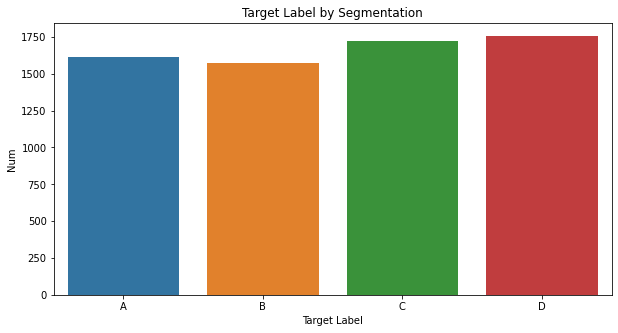

In [25]:
# 각 segment별 개수 비교
plt.subplots(figsize=(10, 5)) # 그래프 자체 크기
sns.countplot(df_Train['Segmentation'].sort_values()) #df_train의 세그먼트 줄을 가져와 값을 정렬하여 그래프에 반영
plt.title('Target Label by Segmentation')
plt.xlabel('Target Label')
plt.ylabel('Num')

plt.show()

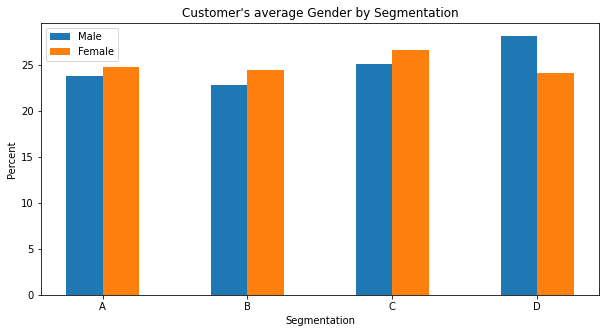

In [26]:
# 각 세그별 성별 분포
x = np.arange(len(gender_based.columns))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(gender_based)):
    index = gender_based.index[1 - i] # 통상적인 인식 순서인 Male, Female 순서를 맞추는 용도
    ax.bar(x + (i * width), gender_based.loc[index] / int(gender_based_sum.loc[index]) * 100, width=width, label=index)

ax.set_xticks(x + ((len(gender_based) / 2 - 0.5) * width))
ax.set_xticklabels(gender_based.columns)

plt.title("Customer's average Gender by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Percent')

plt.legend(loc='best',frameon=True)
plt.show()

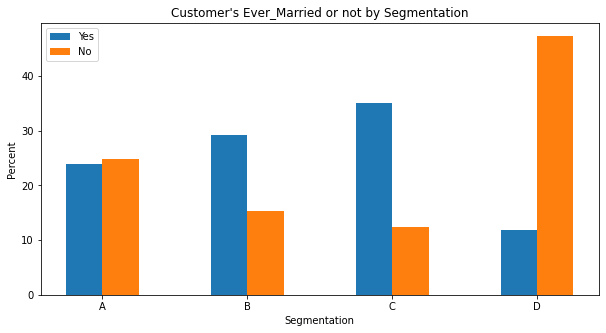

In [27]:
# 각 세그별 결혼 여부
x = np.arange(len(married_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(married_based)):
    index = married_based.index[1 - i]  # 통상적인 인식 순서인 Yes, No 순서를 맞추는 용도
    ax.bar(x + (i * width), married_based.loc[index] / int(married_based_sum.loc[index]) * 100, width=width, label=index)

ax.set_xticks(x + ((len(married_based) / 2 - 0.5) * width))
ax.set_xticklabels(married_based.columns)

plt.title("Customer's Ever_Married or not by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Percent')

plt.legend(loc='best',frameon=True)
plt.show()

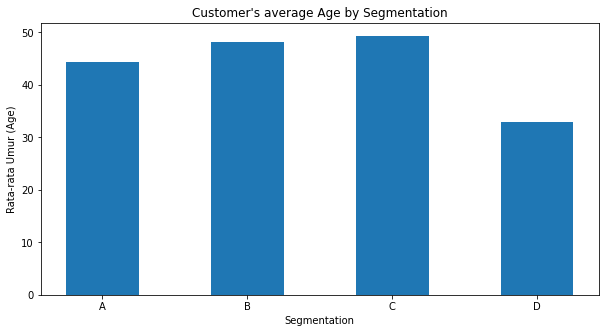

In [28]:
# 각 세그별 평균 연령
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(age_based.index,age_based['Age'],width=0.5)

plt.title("Customer's average Age by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Rata-rata Umur (Age)')
plt.show()

In [29]:
# 각 세그별 연령 분포
for x in ['A', 'B', 'C', 'D']:
    indexes = df_Train.index[df_Train["Segmentation"] == x].tolist()
    ages = df_Train.iloc[indexes]
    fig, ax = plt.subplots(figsize=(12,5))
    sns.distplot(ages["Age"])
    

IndexError: positional indexers are out-of-bounds

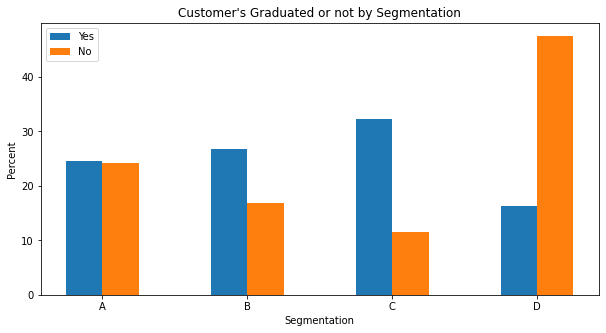

In [ ]:
# 각 세그별 졸업 여부
x = np.arange(len(graduated_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(graduated_based)):
    index = graduated_based.index[1 - i]  # 통상적인 인식 순서인 Yes, No 순서를 맞추는 용도
    ax.bar(x + (i * width), graduated_based.loc[index] / int(graduated_based_sum.loc[index]) * 100, width=width, label=index)

ax.set_xticks(x + ((len(graduated_based) / 2 - 0.5) * width))
ax.set_xticklabels(graduated_based.columns)

plt.title("Customer's Graduated or not by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Percent')

plt.legend(loc='best',frameon=True)
plt.show()

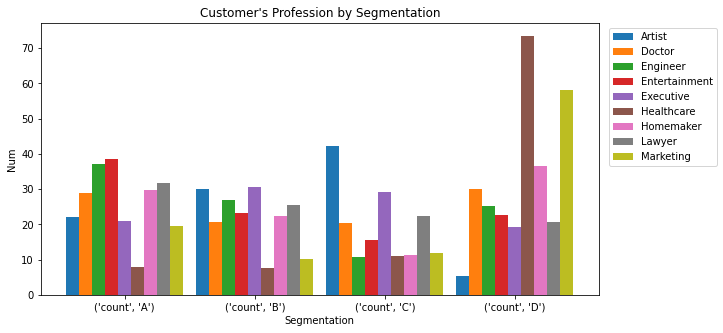

In [ ]:
# 각 세그별 직업
x = np.arange(len(prof_based.columns))
width = 0.1

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(prof_based)):
    index = prof_based.index[i]
    ax.bar(x + (i * width), prof_based.loc[index] / int(prof_based_sum.loc[index]) * 100, width=width, label=index)

ax.set_xticks(x + ((len(prof_based) / 2 - 0.5) * width))
ax.set_xticklabels(prof_based.columns)

plt.title("Customer's Profession by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')

plt.legend(loc='best', bbox_to_anchor=(0.92, 0.40, 0.3, 0.6), frameon=True)
plt.show()

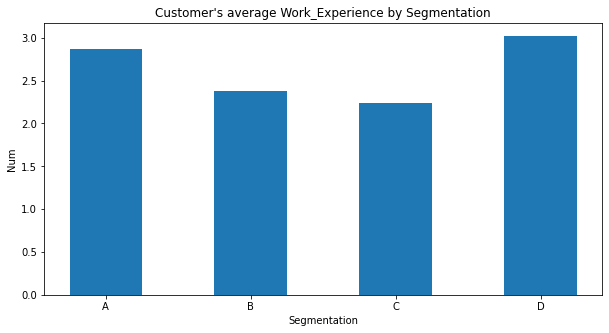

In [ ]:
# 각 세그별 Work Experience
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(workexp_based.index, workexp_based['Work_Experience'], width=0.5)

plt.title("Customer's average Work_Experience by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')
plt.show()

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

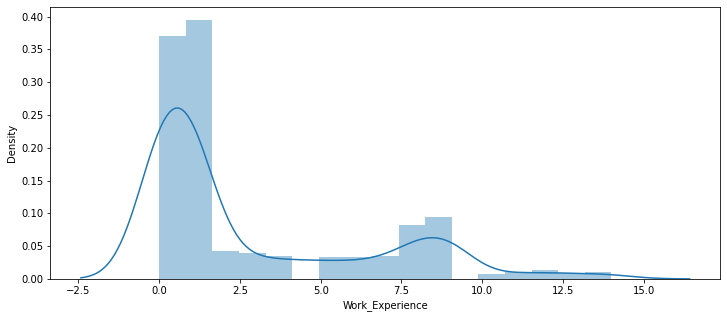

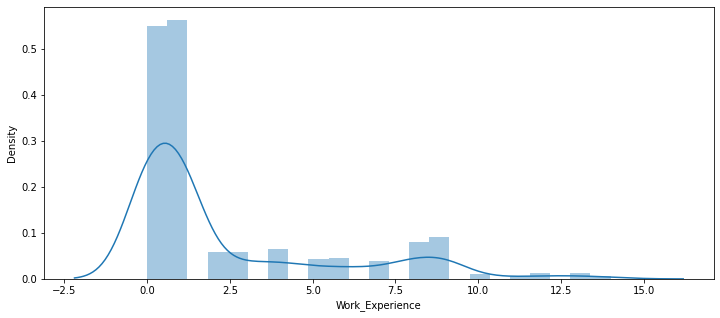

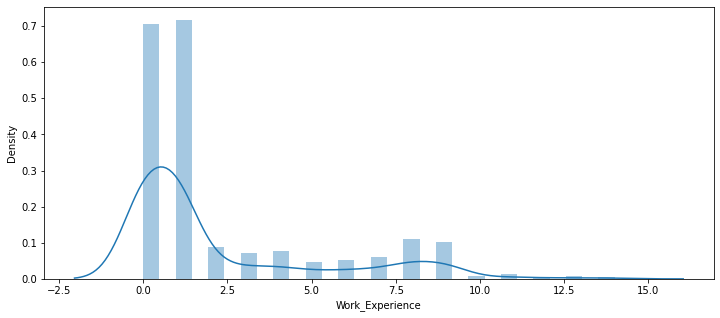

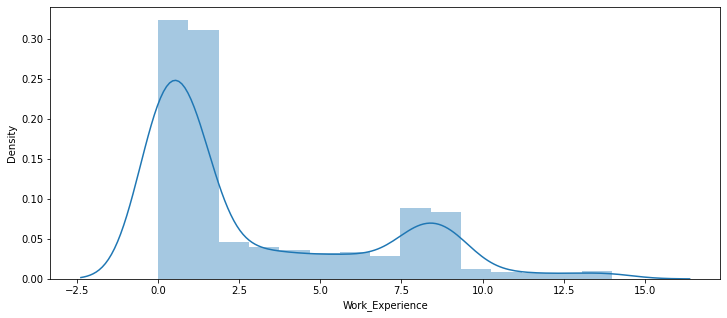

In [ ]:
# 각 세그별 경험 분포
for x in ['A', 'B', 'C', 'D']:
    indexes = df_Train.index[df_Train["Segmentation"] == x].tolist()
    exps = df_Train.iloc[indexes]
    fig, ax = plt.subplots(figsize=(12,5))
    sns.distplot(exps["Work_Experience"])

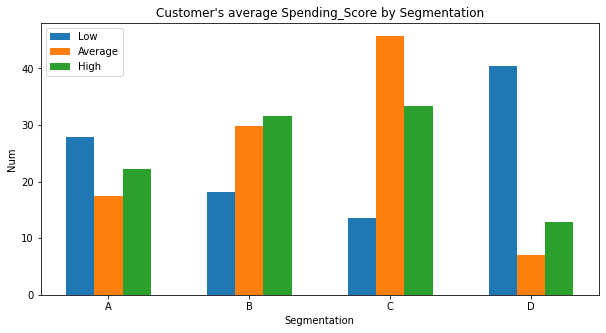

In [ ]:
# 각 세그별 소비 수준 비율
x = np.arange(len(spend_based.columns))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(spend_based)):
    index = spend_based.index[i]
    ax.bar(x + (i * width), spend_based.loc[index] / int(spend_based_sum.loc[index]) * 100, width=width, label=index)

ax.set_xticks(x + ((len(spend_based) / 2 - 0.5) * width))
ax.set_xticklabels(spend_based.columns)

plt.title("Customer's average Spending_Score by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')

plt.legend(loc='best',frameon=True)
plt.show()

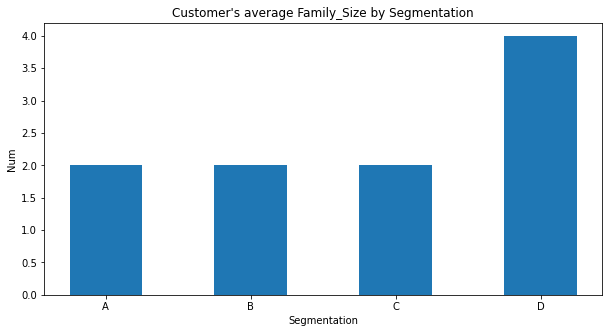

In [ ]:
# 각 세그별 가족구성 수 분포
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(famsize_based.index, famsize_based['Family_Size'], width=0.5)

plt.title("Customer's average Family_Size by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')
plt.show()

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

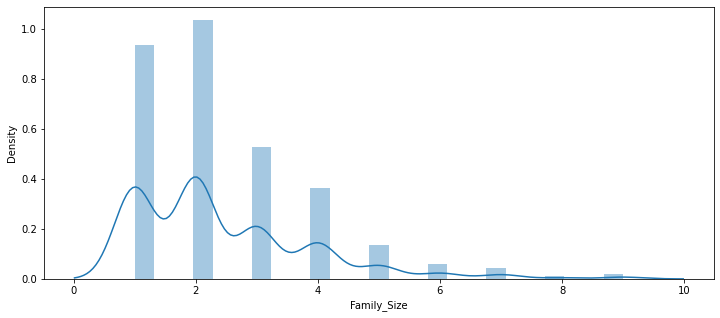

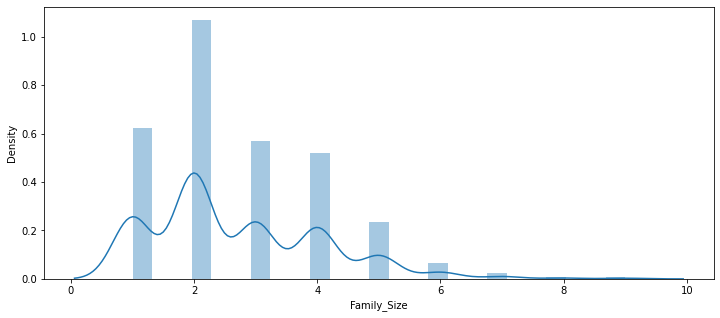

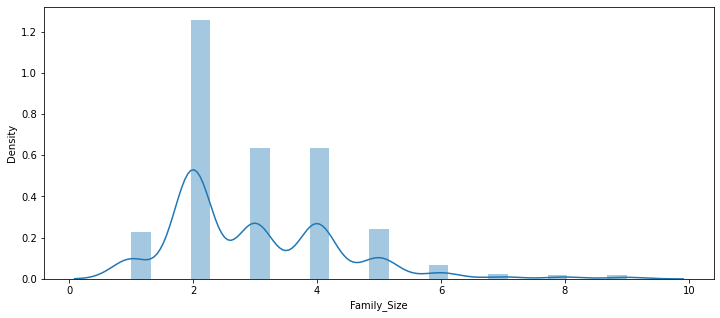

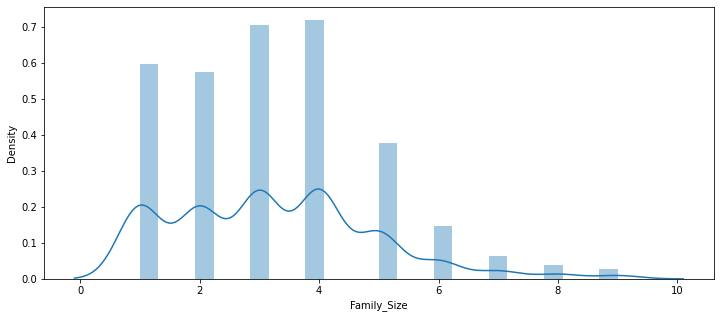

In [ ]:
# 각 세그별 가족 구성수 분포
for x in ['A', 'B', 'C', 'D']:
    indexes = df_Train.index[df_Train["Segmentation"] == x].tolist()
    fam_num = df_Train.iloc[indexes]
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.distplot(fam_num["Family_Size"])

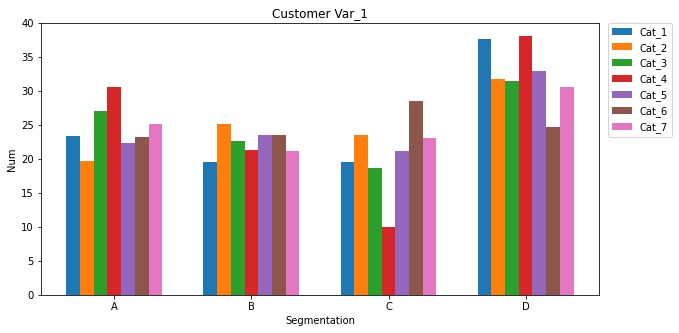

In [ ]:
# 각 세그별 카테고리 분류
x = np.arange(len(var_based.columns))
width = 0.1

fig,ax = plt.subplots(figsize=(10, 5))
for i in range(len(var_based)):
    index = var_based.index[i]
    ax.bar(x + (i * width), var_based.loc[index] / int(var_based_sum.loc[index]) * 100, width=width, label=index)

ax.set_xticks(x + ((len(var_based) / 2 - 0.5) * width))
ax.set_xticklabels(var_based.columns)

plt.title('Customer Var_1')
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')

plt.legend(loc='best', bbox_to_anchor=(0.84,0.42,0.3,0.6), frameon=True)
plt.show()

# 딥러닝

In [61]:
data_set = df_Train.values
data_set = data_set[:, 1:11]

dic = {
    "Male":0, "Female":1,
    "Yes":0, "No":1,
    "Artist":0, "Healthcare":1, "Engineer":2, "Lawyer":3, "Entertainment":4, "Executive":5, "Doctor":6, "Homemaker":7, "Marketing":8,
    "Low":0, "Average":1, "High":2,
    "Cat_1":0, "Cat_2":1, "Cat_3":2, "Cat_4":3, "Cat_5":4, "Cat_6":5, "Cat_7":6,
    "A":0, "B":1, "C":2, "D":3
}

for j in range(len(data_set[0])):
    for i in range(len(data_set)):
        if data_set[i][j] in dic.keys():
            data_set[i][j] = dic[data_set[i][j]]

In [62]:
print(data_set[:, :-1])
x = data_set[:, :-1].astype(float)
y_obj = data_set[:, 9]
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

[[0 1 22 ... 0 4.0 3]
 [1 0 67 ... 0 1.0 5]
 [0 0 67 ... 2 2.0 5]
 ...
 [1 1 33 ... 0 1.0 5]
 [1 1 27 ... 0 4.0 5]
 [0 0 37 ... 1 3.0 3]]


In [3]:
model = Sequential()
model.add(Dense(30, input_dim=9, activation="softmax"))
model.add(Dense(30, activation="relu"))
model.add(Dense(4, activation="softmax")) # dense 이후 숫자가 결과값의 총 개수

In [70]:
seed = 0
np.random.seed(seed)

n_fold = 10
skf = StratifiedGroupKFold(n_splits=n_fold, shuffle=True, random_state=seed)

accuracy = []
# x_train, x_test, y_train, y_test = train_test_split(x, Y_encoded, test_size=0.3, random_state=seed)


In [ ]:
for train, test in skf.split(x, y):
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    Y_encoded_train = np_utils.to_categorical(y[train])
    Y_encoded_test = np_utils.to_categorical(y[test])

    model.fit(x[train], Y_encoded_train, epochs=1000, batch_size=1000) # batch size가 100 이상이면 메모리 꽉차서 문제 생길수도 있음

    k_accuracy = f"{model.evaluate(x[test], Y_encoded_test)[1]}"
    accuracy.append(k_accuracy)


print(f"\n {n_fold} fold accuarcy {accuracy}")